# SCIKIT LEARN - MULTIPLE LINEAR REGRESSION

$$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + \cdots + b_{n}x_{n} + \epsilon$$

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data x = "square meters & bedrooms" and y  = "sales"
data = {
    'square_meters': [45, 50, 60, 60, 70, 80, 90, 90, 100, 110],
    'bedrooms': [1, 1, 1, 2, 2, 2, 2, 3, 4, 4],
    'Sales': [150, 160, 200, 180, 230, 250, 300, 280, 300, 400]
}
df = pd.DataFrame(data)
x = df[['square_meters', 'bedrooms']]  # Independent variable (features)
y = df['Sales']  # Dependent variable (target)

In [7]:
# Number of observations
n = len(x) 
print(f"Number of observations: {n}")

Number of observations: 10


In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(x, y)

In [9]:
# Get the coefficients and intercept
intercept = model.intercept_ 
coefficients = model.coef_ 
print(f"Coefficient β0 (Intercept): {intercept}")
print(f"Coefficients β1 (slope): {coefficients}")

Coefficient β0 (Intercept): -30.04105571847498
Coefficients β1 (slope): [  3.96832845 -11.16715543]


In [10]:
# Hacer predicciones usando sklearn models
y_pred = model.predict(x)
print(f"y_pred:\n{y_pred}")

# Hacer predicciones manualmente
y_pred = intercept + (coefficients[0] * x['square_meters'].values) + (coefficients[1] * x['bedrooms'].values)
print(f"y_pred (Manual):\n{y_pred}")

y_pred:
[137.36656891 157.20821114 196.8914956  185.72434018 225.40762463
 265.09090909 304.77419355 293.60703812 322.12316716 361.80645161]
y_pred (Manual):
[137.36656891 157.20821114 196.8914956  185.72434018 225.40762463
 265.09090909 304.77419355 293.60703812 322.12316716 361.80645161]


In [11]:
# Evaluar el modelo

# Error medio cuadrado, mean square error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Error medio cuadrado manual
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error (Manual): {mse:.2f}")

# Coeficiente Determinación (R2)
# 1 is perfect prediction > se trata de una estimación imparcial del rendimiento predictivo de su modelo
r2 = r2_score(y, y_pred)
print(f"Coefficient of determination: {r2:.2f}")
print(f"Coefficient of determination: {model.score(x, y):.2f}")

# Coeficiente determinación manual
y_mean = np.mean(y)
SS_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
SS_tot = np.sum((y - y_mean) ** 2)  # Total sum of squares
r2 = 1 - (SS_res / SS_tot)
print(f"Coefficient of determination (Manual): {r2:.2f}")

Mean Squared Error: 261.48
Mean Squared Error (Manual): 261.48
Coefficient of determination: 0.95
Coefficient of determination: 0.95
Coefficient of determination (Manual): 0.95


In [32]:
# Resumen
df_result = pd.DataFrame({
    'x1 (meters)': x['square_meters'],
    'x2 (bedrooms)': x['bedrooms'],
    'y': y,
    'y_pred': y_pred,
    '(y - y_pred)': y - y_pred,
    '(y - y_pred)**2': (y - y_pred)**2
})
print(df_result)

   x1 (meters)  x2 (bedrooms)    y      y_pred  (y - y_pred)  (y - y_pred)**2
0           45              1  150  137.366569     12.633431       159.603581
1           50              1  160  157.208211      2.791789         7.794085
2           60              1  200  196.891496      3.108504         9.662800
3           60              2  180  185.724340     -5.724340        32.768070
4           70              2  230  225.407625      4.592375        21.089912
5           80              2  250  265.090909    -15.090909       227.735537
6           90              2  300  304.774194     -4.774194        22.792924
7           90              3  280  293.607038    -13.607038       185.151486
8          100              4  300  322.123167    -22.123167       489.434525
9          110              4  400  361.806452     38.193548      1458.747138


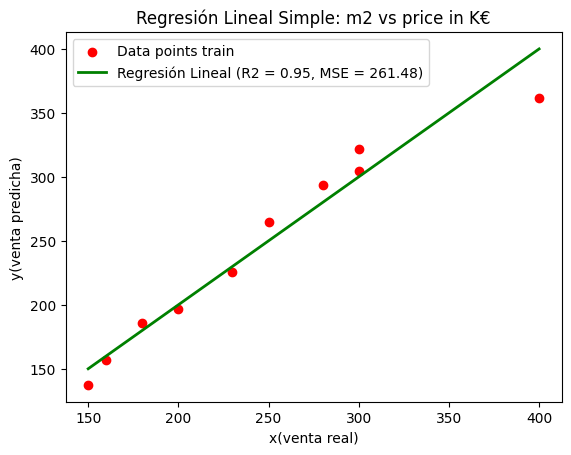

In [12]:
# Gráfico de predicciones vs reales
plt.scatter(y, y_pred, color='red', label='Data points train')
plt.plot([min(y), max(y)], [min(y), max(y)], color='green', linewidth=2, label=f'Regresión Lineal (R2 = {r2:.2f}, MSE = {mse:.2f})')
plt.title('Regresión Lineal Multiple')
plt.xlabel('x(venta real)')
plt.ylabel('y(venta predicha)')
plt.legend()
plt.show()

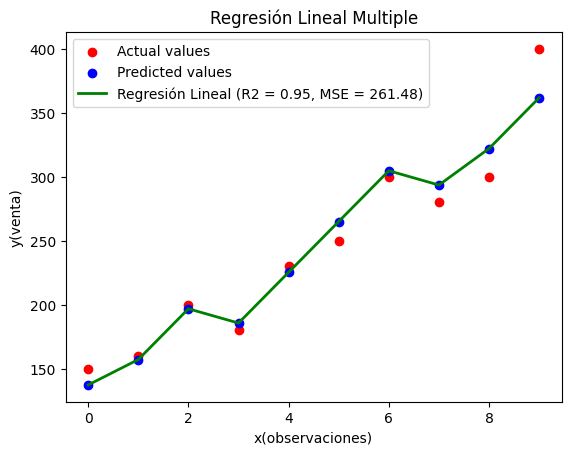

In [21]:
# Gráfico de predicciones vs reales
plt.scatter(df.index, y, color='red', label='Actual values')
plt.scatter(df.index, y_pred, color='blue', label='Predicted values')
plt.plot(df.index, y_pred, color='green', linewidth=2, label=f'Regresión Lineal (R2 = {r2:.2f}, MSE = {mse:.2f})')
plt.title('Regresión Lineal Multiple')
plt.xlabel('x(observaciones)')
plt.ylabel('y(venta)')
plt.legend()
plt.show()